In [2]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [10]:
#memuat publik dataset dari mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [11]:
# data hanya 2 dimensi
# ekspektasi konvolusi tinggi x lebar x warna
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [12]:
# jumlah kelas
K = len(set(y_train))
print("Jumlah kelas: ", K)

Jumlah kelas:  10


In [14]:
# Membuat model CNN menggunakan functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [16]:
#Mengompile dan mentraining
# Disarankan menggunakan GPU dalam proses training
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
train = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 17)

Epoch 1/17
1875/1875 [==============================] - 45s 18ms/step - loss: 0.5564 - accuracy: 0.8040 - val_loss: 0.4229 - val_accuracy: 0.8400
Epoch 2/17
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4022 - accuracy: 0.8497 - val_loss: 0.3980 - val_accuracy: 0.8509
Epoch 3/17
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3646 - accuracy: 0.8634 - val_loss: 0.3759 - val_accuracy: 0.8634
Epoch 4/17
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3464 - accuracy: 0.8698 - val_loss: 0.3640 - val_accuracy: 0.8671
Epoch 5/17
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3264 - accuracy: 0.8760 - val_loss: 0.3568 - val_accuracy: 0.8665
Epoch 6/17
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3120 - accuracy: 0.8819 - val_loss: 0.3797 - val_accuracy: 0.8632
Epoch 7/17
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3014 - accuracy: 0.8842 - val_loss: 0.3526 -

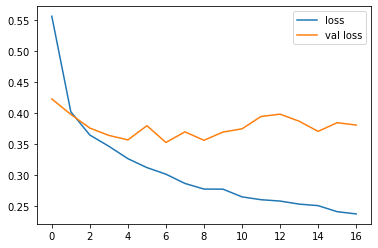

In [18]:
# Visualisasi loss per iterasi
import matplotlib.pyplot as plt
plt.plot(train.history['loss'], label='loss')
plt.plot(train.history['val_loss'], label='val loss')
plt.legend()

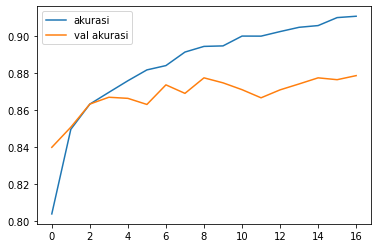

In [19]:
# Visualisasi akurasi per iterasi
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'], label='akurasi')
plt.plot(train.history['val_accuracy'], label='val akurasi')
plt.legend()

Confusion Matrix, without normalization
[[834   4  25  21   2   1 107   1   5   0]
 [  2 975   1  17   1   0   2   0   2   0]
 [ 16   1 794  13  87   0  89   0   0   0]
 [  9  10  17 892  35   1  36   0   0   0]
 [  1   2  57  29 816   0  93   0   2   0]
 [  0   0   0   0   0 960   0  21   4  15]
 [146   1  75  31 110   0 623   0  14   0]
 [  0   0   0   0   0  12   0 955   1  32]
 [  1   0   2   4   6   2   4   1 979   1]
 [  1   0   0   0   0   4   0  35   0 960]]


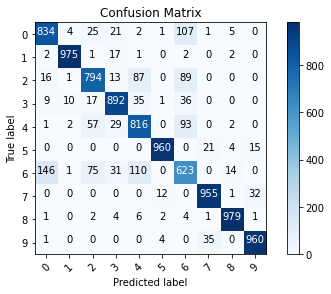

In [20]:
# plot confussion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix, without normalization")

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
                            plt.text(j, i, format(cm[i, j], fmt), 
                                horizontalalignment="center",
                                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))
    

In [39]:
# Label mapping
labels = ''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot'''.split()

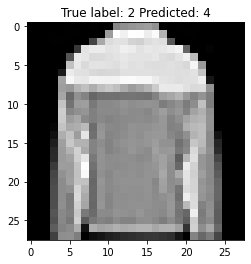

In [41]:
# menampilkan contoh beberapa misklasifikasi
misclassified_idx = np.where(p_test != y_test)[0] # mencari yang tidak sama
i = np.random.choice(misclassified_idx) #memilih secara random
plt.imshow(x_test[i], cmap='gray') #visualisasi
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));